# Статистическая обработка временных рядов
## Лабораторная 3.

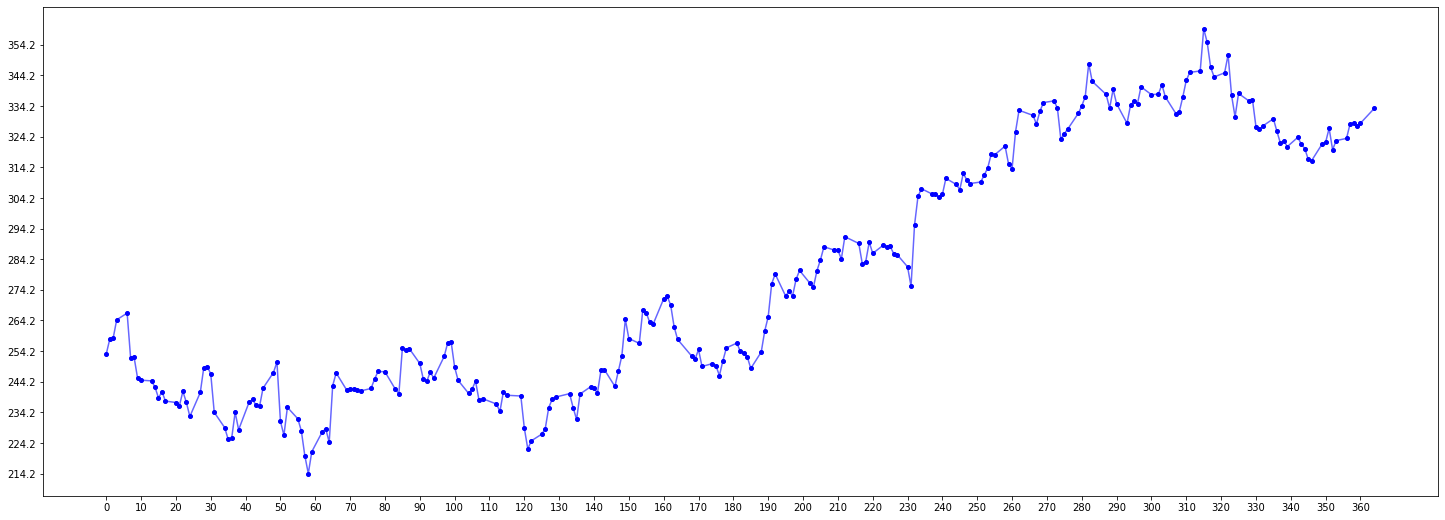

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from time import mktime
from datetime import datetime

df = pd.read_csv('/home/max/MSFT.csv', parse_dates = True)
days = [datetime.fromtimestamp(mktime(time.strptime(df['Date'][i], '%Y-%m-%d'))) for i in range(df.shape[0])]
days_by_ind = [(days[i] - days[0]).days for i in range(df.shape[0])]
sales = pd.DataFrame(data = {'Day': days_by_ind, 'Close': df['Close']})

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 9))
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4)
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6)
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));

In [33]:
def make_plot(series1, series2, days1, days2, name = ''):
    plt.figure(figsize=(25, 12))
    plt.subplot(2, 1, 1);
    plt.plot(np.array(days1), np.array(series1), 'ob', alpha = 1, markersize = 4);
    plt.plot(np.array(days1), np.array(series1), 'b', alpha = 0.6);
    plt.xticks(np.arange(0, max(days1), 10));
    plt.yticks(np.arange(min(series1), max(series1), 10));

    plt.subplot(2, 1, 2);
    plt.plot(np.array(days2), np.array(series2), "og");
    plt.plot(np.array(days2), np.array(series2), "g");
    plt.xticks(np.arange(0, max(days_by_ind), 10));
    plt.title(name, size = 20)

def make_plot_on_same_canvas(series1, series2, days1, days2):
    plt.figure(figsize=(25, 12))
    plt.xticks(np.arange(0, max(days1), 10));
    plt.yticks(np.arange(min(series1), max(series1), 10));
    plt.plot(np.array(days1), np.array(series1), 'b', alpha = 0.6);
    plt.plot(np.array(days2), np.array(series2), "r");

def make_num_of_plots_on_same_canvas(series, series1, days, days1, names):
    N = len(series1)
    fig, axs = plt.subplots(N, 1, sharey=False, tight_layout=False, figsize=(30, 15 * N))
    for i in range(N):
        axs[i].plot(np.array(days), np.array(series), 'b', alpha = 0.6);
        axs[i].plot(np.array(days1[i]), np.array(series1[i]), "r");
        axs[i].set_title(names[i])
        axs[i].title.set_size(20)
    plt.subplots_adjust(wspace = 0.5)


### Тест Дики-Фуллера

In [3]:
from statsmodels. tsa.stattools import adfuller

dickey_fuller_test_result = adfuller(sales['Close'])
print(f'Значение статистики: {dickey_fuller_test_result[0]}; P-value = {dickey_fuller_test_result[1]}')

Значение статистики: -0.4358338302316326; P-value = 0.9039417072021667


Поскольку значение p-value нашей статистики превосходит 0.05, мы не
можем принять гипотезу о стационарности исследуемого ряда.

### Построим автокоррелограмму

Автокорреляционная функция в общем виде вычисляется согласно следующей
формуле:

$K(t,\tau) = M\left\{ X(t) \cdot \overline{X}(t,t - \tau) \right\}$.

Значения коррелограммы, несущей информацию о сезонности ряда,
вычисляются согласно следующей формуле:

$r_{h} = \frac{c_{h}}{c_{0}}$,

$c_{h} = \frac{1}{N}\sum_{t = 1}^{N - h}\left( y_{t} - \overline{y} \right)\left( y_{t + h} - \overline{y} \right)$,

$c_{0} = \frac{1}{N}\sum_{t = 1}^{N - h}\left( y_{t} - \overline{y} \right)^{2}$.

Вторая формула есть функция автоковариации, третья — функция вариации.

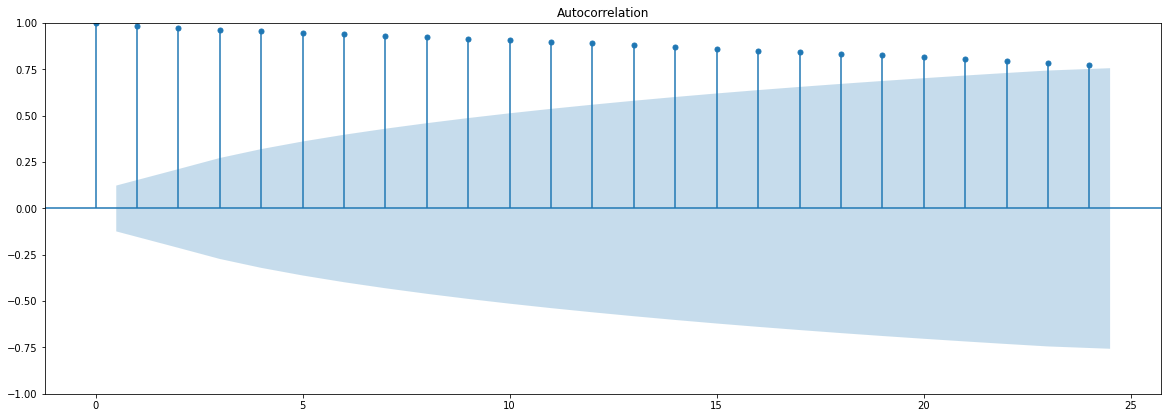

In [17]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales['Close'], ax =ax1)


### Построим частичную функцию автокорреляции

Частичная автокорреляция похожа на обычную
автокорреляцию,
однако дополнительно удаляет линейную зависимость между cдвинутыми
рядами. Она определяется по следующей формуле:

$pacf(k) = corr\left( y_{t + k} - y_{t + k}^{k - 1},y_{t} - y_{t}^{k - 1} \right),k > 1$,

$y_{t}^{k - 1} = \sum_{i = 1}^{k - 1}\beta_{i}y_{t + i}$,

$y_{t + k}^{k - 1} = \sum_{i = 1}^{k - 1}\beta_{i}y_{t + k - i}$.

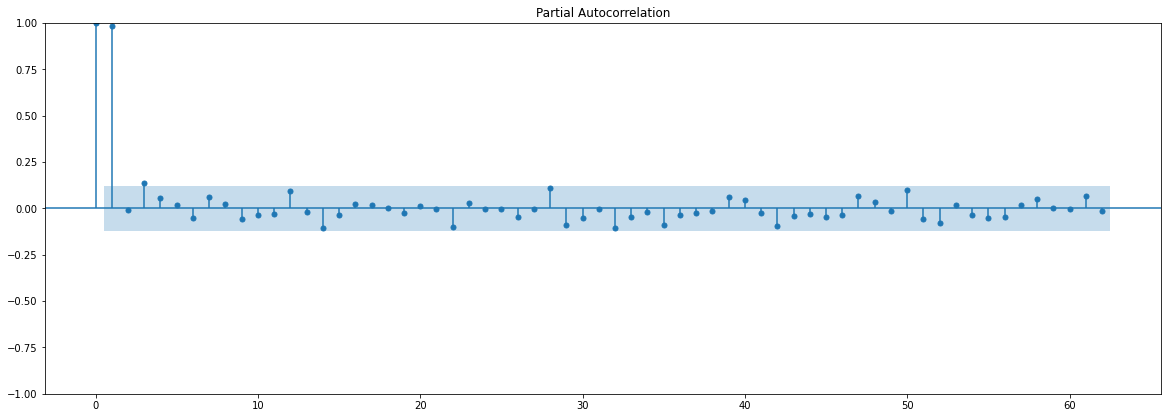

In [5]:
fig = plt.figure(figsize=(20, 15))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales['Close'], lags = 0.25 * len(sales['Close']), ax = ax2)

### Построим линейную регрессию

Линейная регрессия предполагает, что существует следующая временная
зависимость между дискретными временными интервалами и значениями ряда:

$\hat{y_{t}} = \alpha x_{t} + \beta + \epsilon_{t}$,

где $\epsilon_{t}$- стандартно нормально распределённая ошибка(или шум),
а коэффициенты регрессии $\alpha$и $\beta$определяются согласно методу
наименьших квадратов, то есть таким образом, чтобы минимизировался
следующий функционал:

$\sum_{t = 1}^{N}\left( \hat{y_{t}} - y_{t} \right)^{2}$.

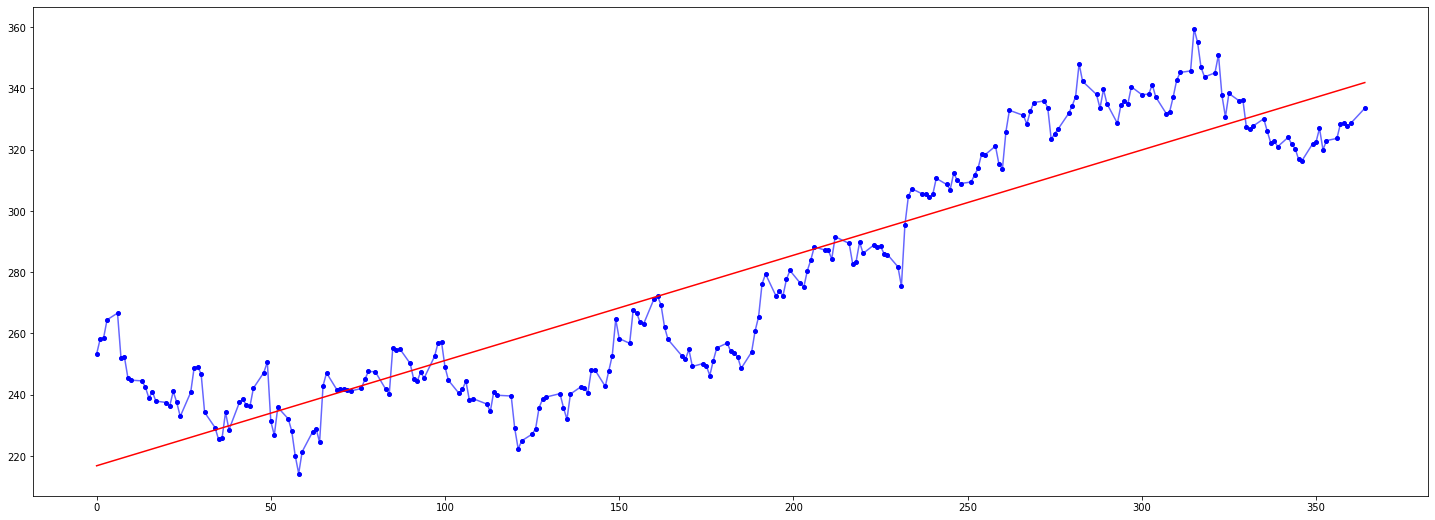

In [102]:
from sklearn.linear_model import LinearRegression

x = np.array(sales['Day']).reshape(-1, 1)
y = np.array(sales['Close']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
plt.figure(figsize=(25, 9))
plt.plot(x, y, 'ob', alpha = 1, markersize = 4);
plt.plot(x, y, 'b', alpha = 0.6);
plt.plot(x, y_pred, 'r');
yt = np.array([sales['Close'][i] - y_pred[i][0] for i in range(len(y_pred))])


##### Будем считать, что построенная нами регрессионная линейная модель с достаточной точностью отражает тренд. Вычтем этот тренд из исходного ряда, отобразим результат, и применим к нему тест Дики-Фуллера ещё раз

Значение статистики: -2.829343412377159; P-value = 0.05420297546099213


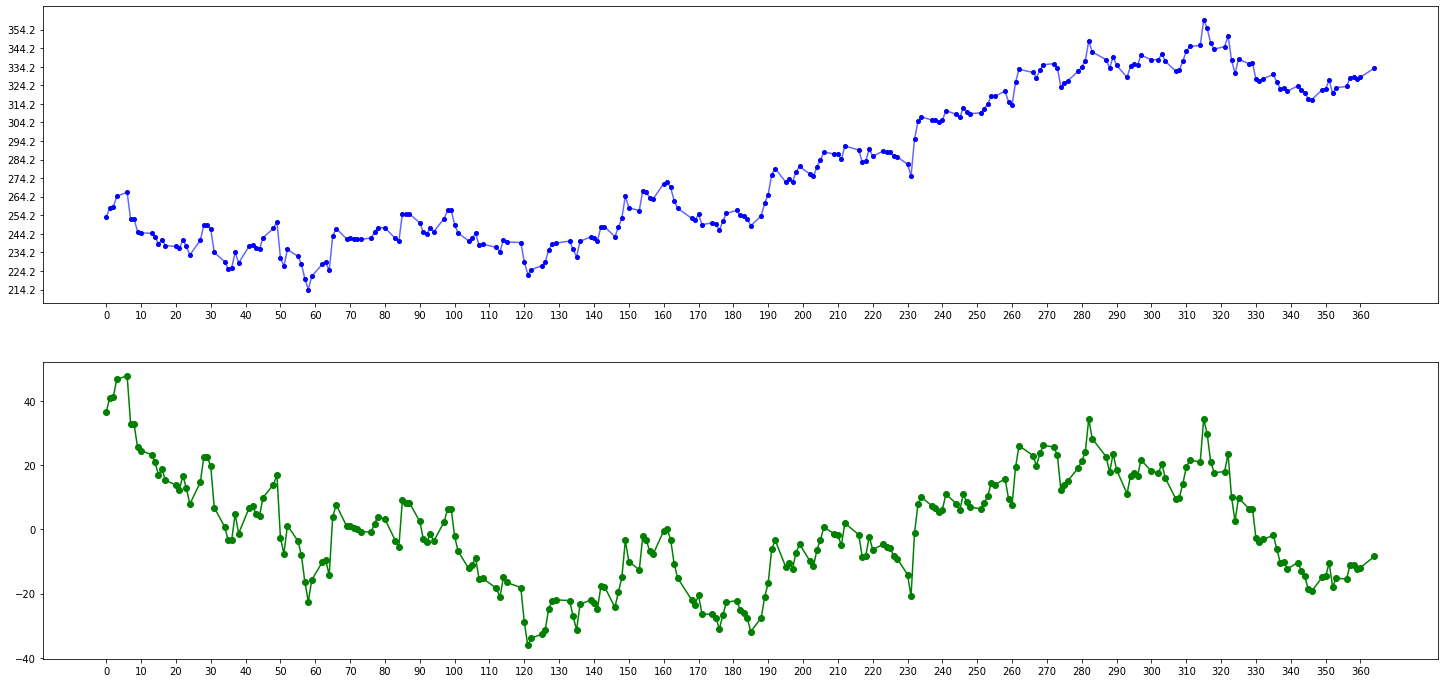

In [104]:
make_plot(sales['Close'], yt, sales['Day'], sales['Day'])

dickey_fuller_test_result = adfuller(yt)
print(f'Значение статистики: {dickey_fuller_test_result[0]}; P-value = {dickey_fuller_test_result[1]}')

##### На основе сравнения p-value, полученного после вычитания тренда, представленного линейной регрессией, можно сделать вывод, что после ещё одного преобразования полученного ряда, можно будет с высокой уверенностью утверждать о его сезонности 

### Преобразование Бокса-Кокса

Преобразование Бокса-Кокса осуществляется по следующей формуле:

$\hat{y_{t}} = \begin{Bmatrix}
\frac{y_{t}^{\lambda - 1}}{\lambda},\lambda \neq 0 \\
\log\left( y_{t} \right),\lambda = 0 \\
\end{Bmatrix}$.

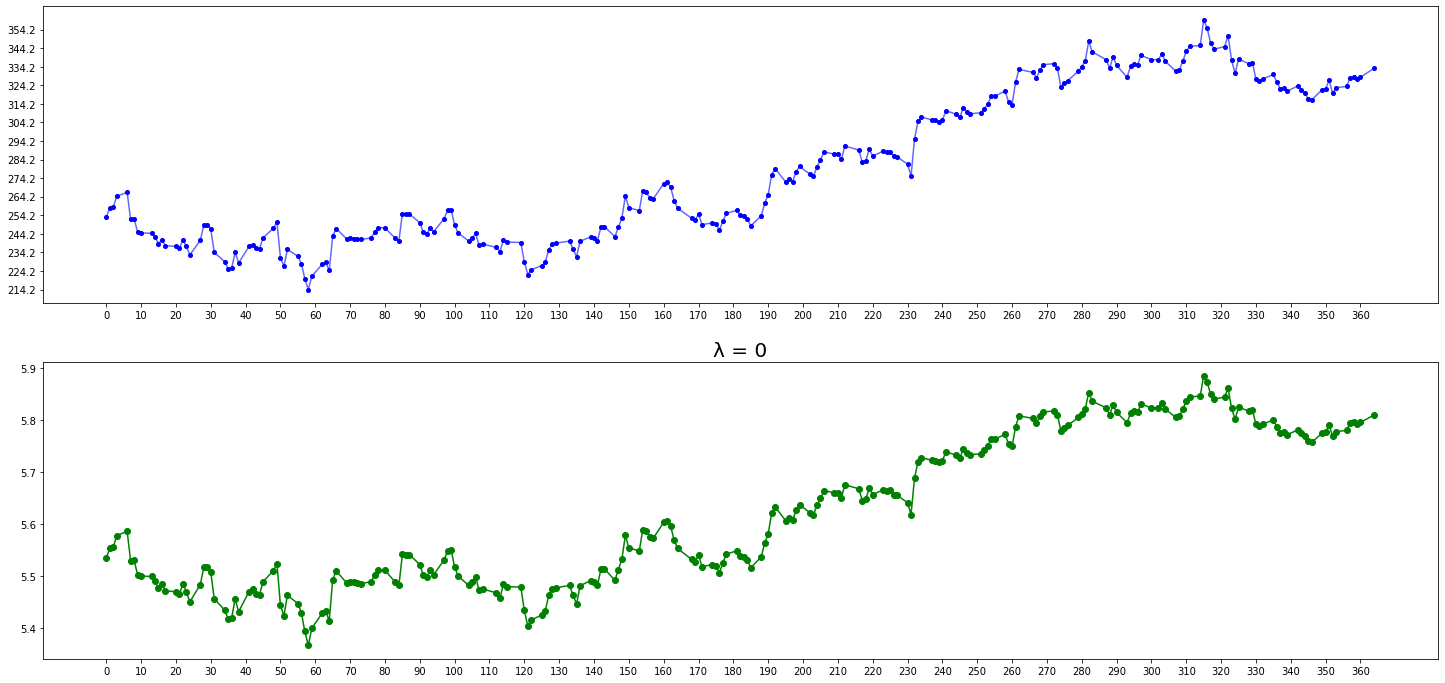

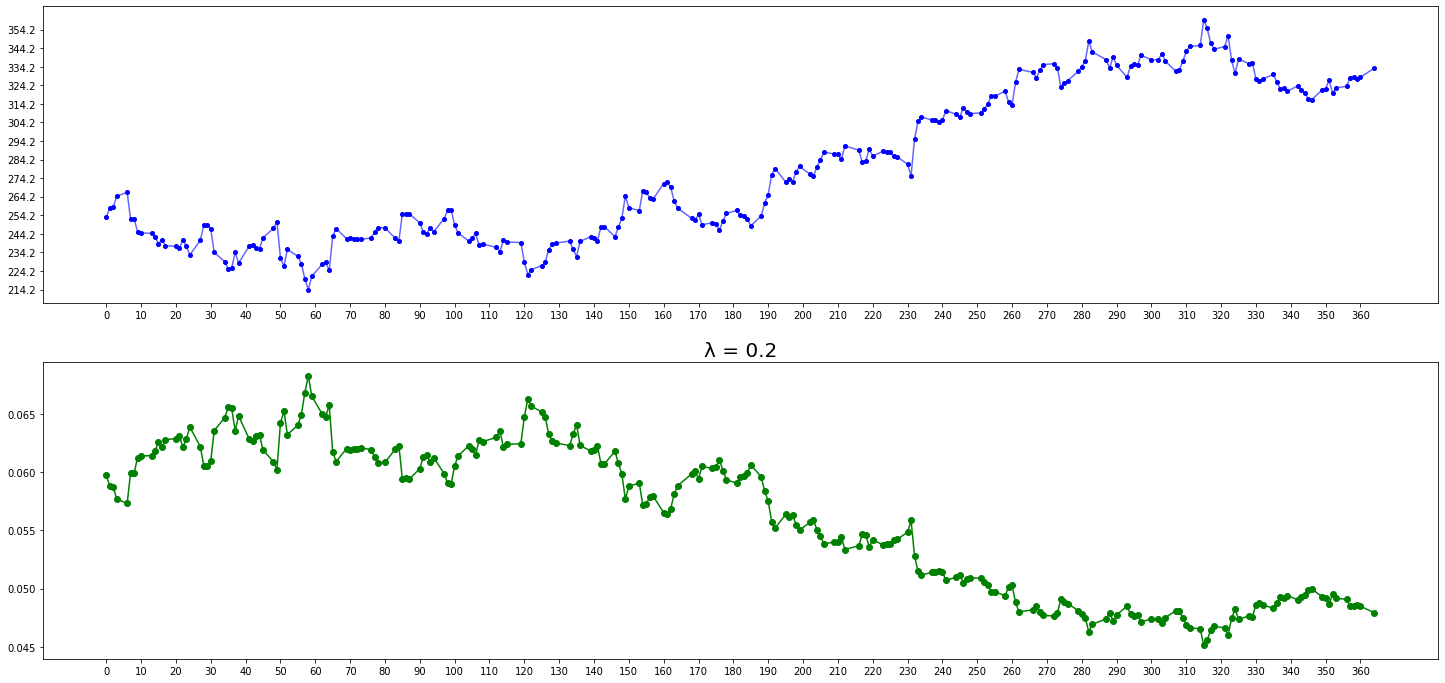

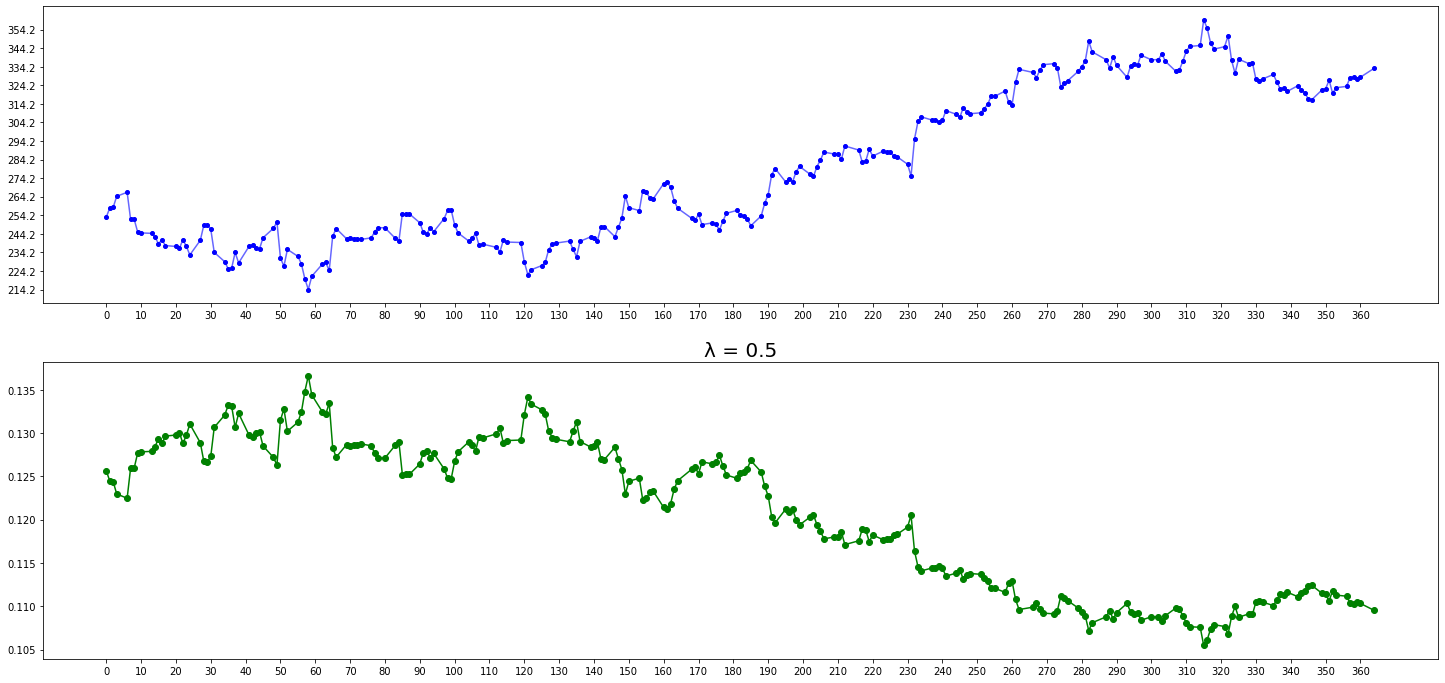

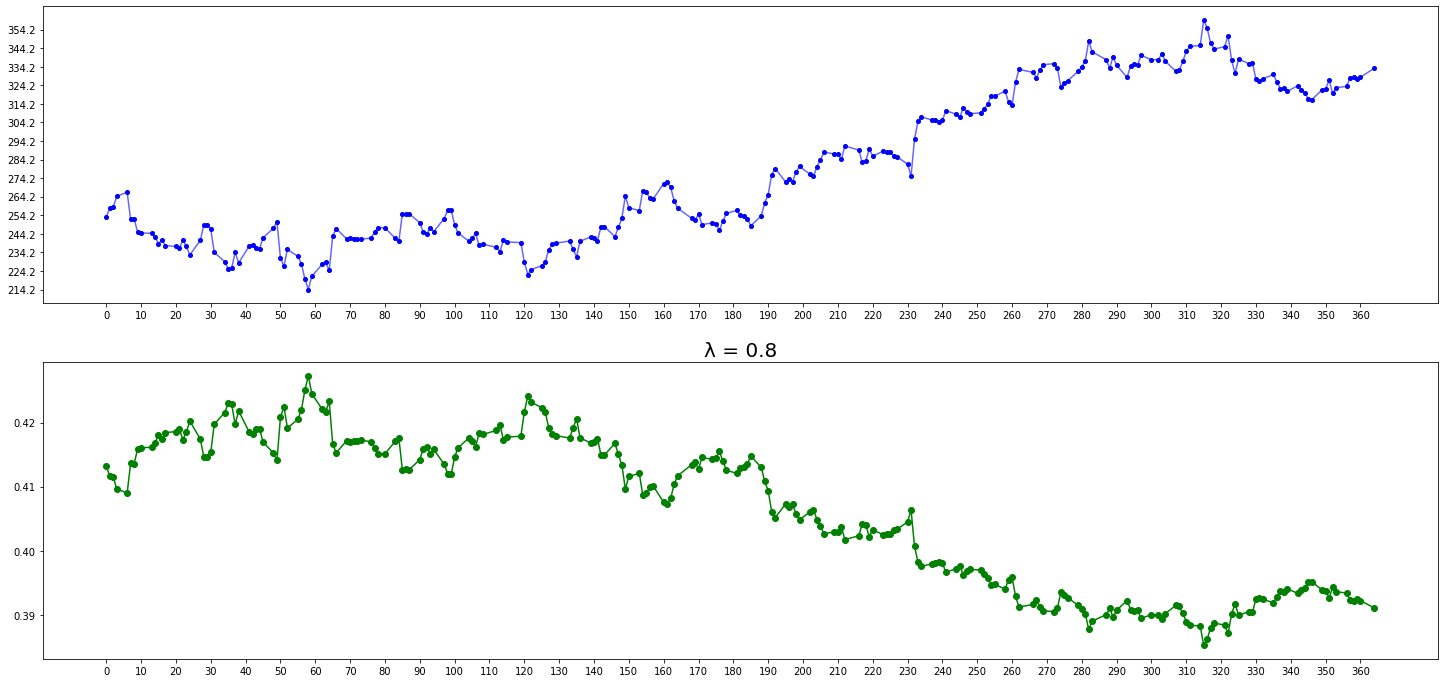

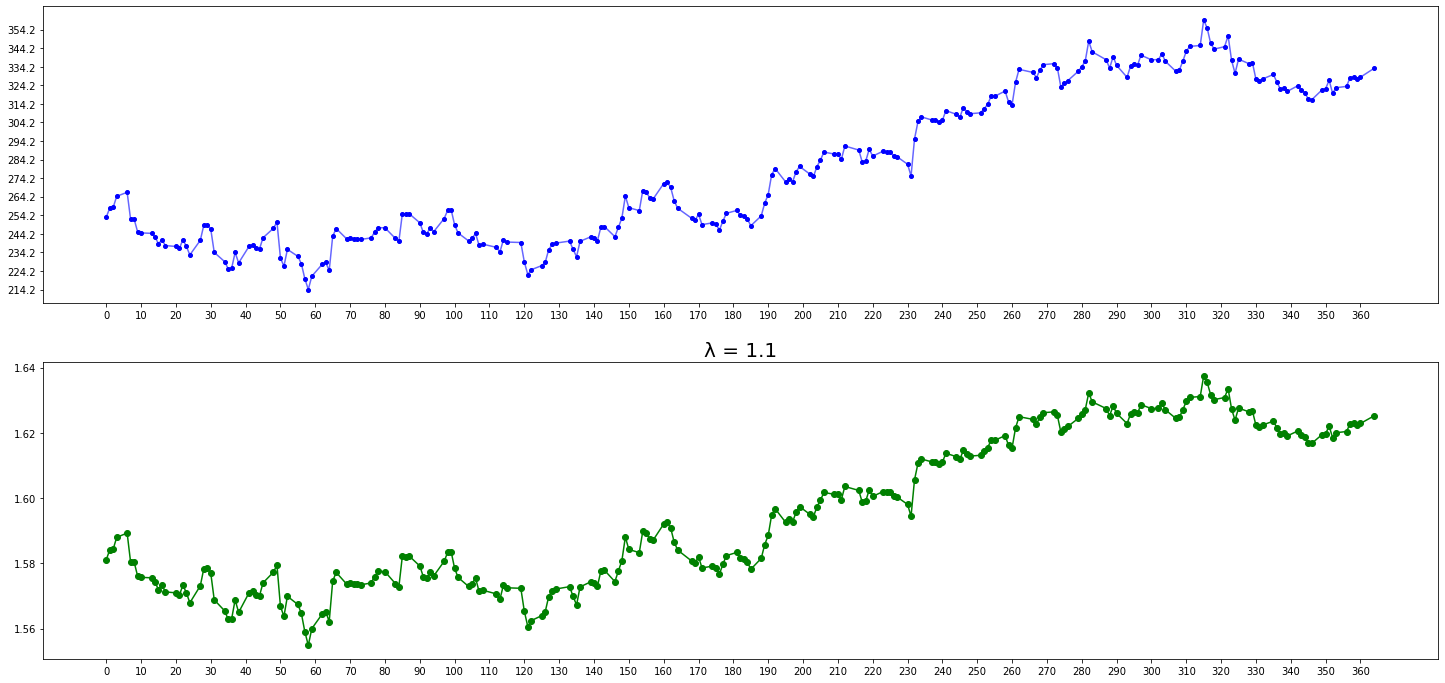

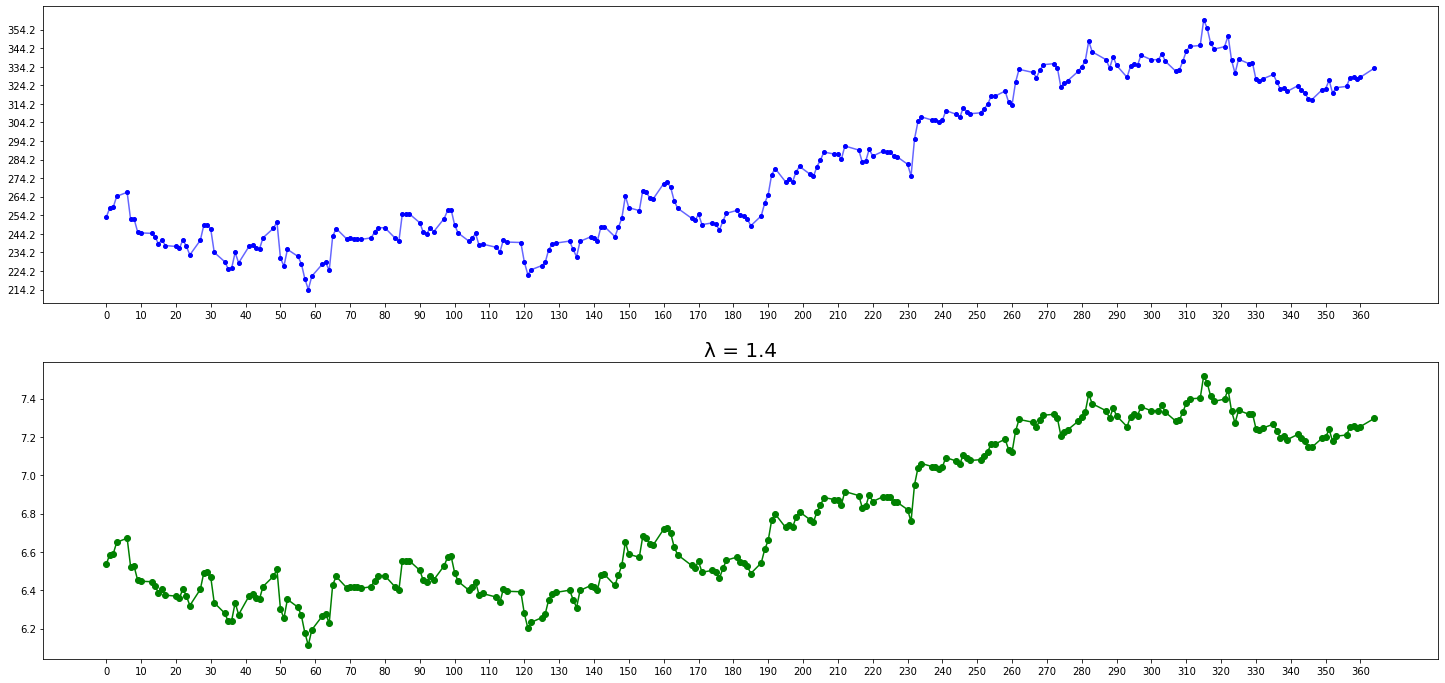

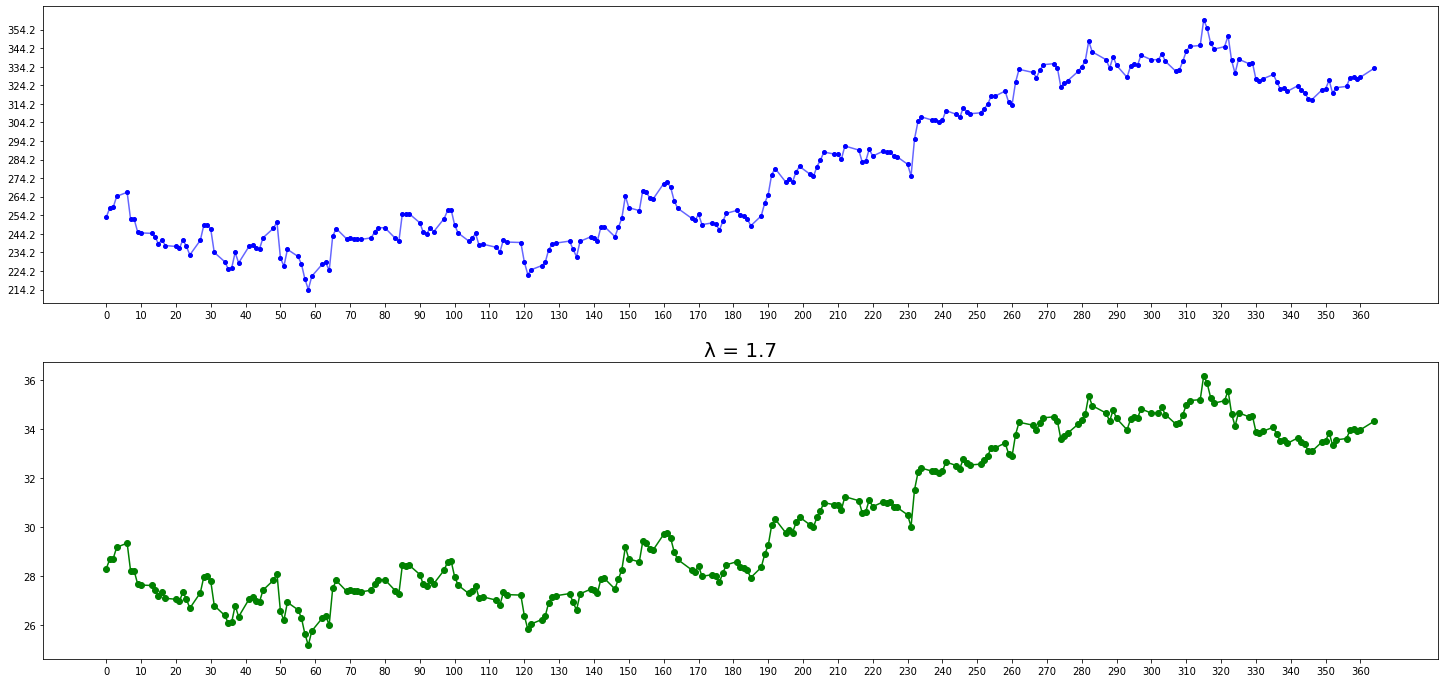

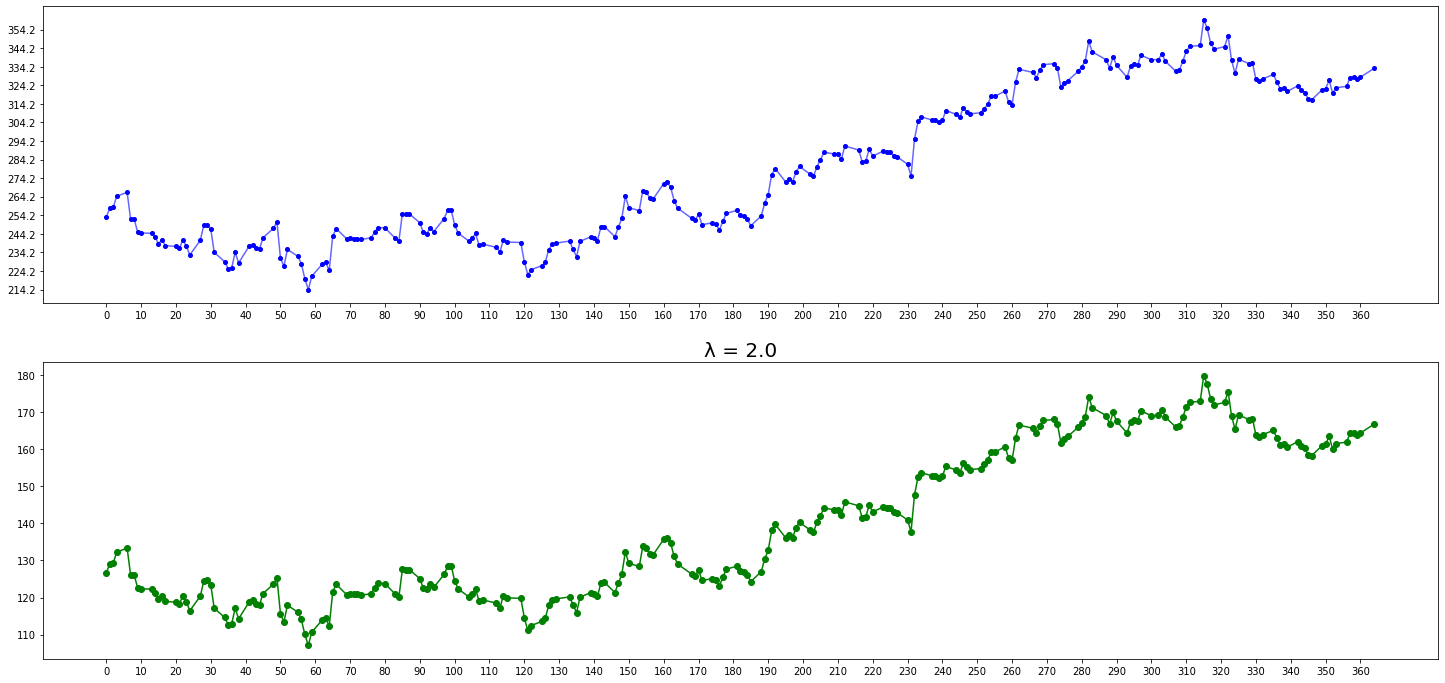

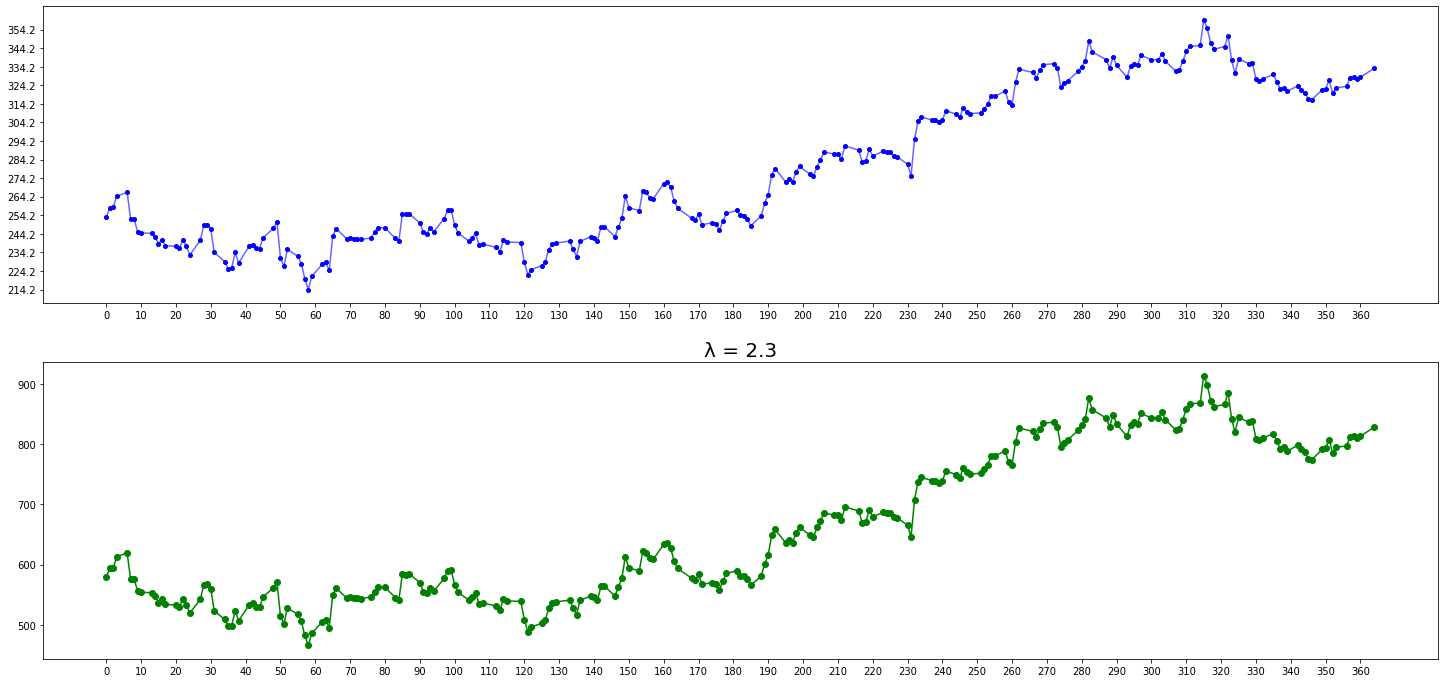

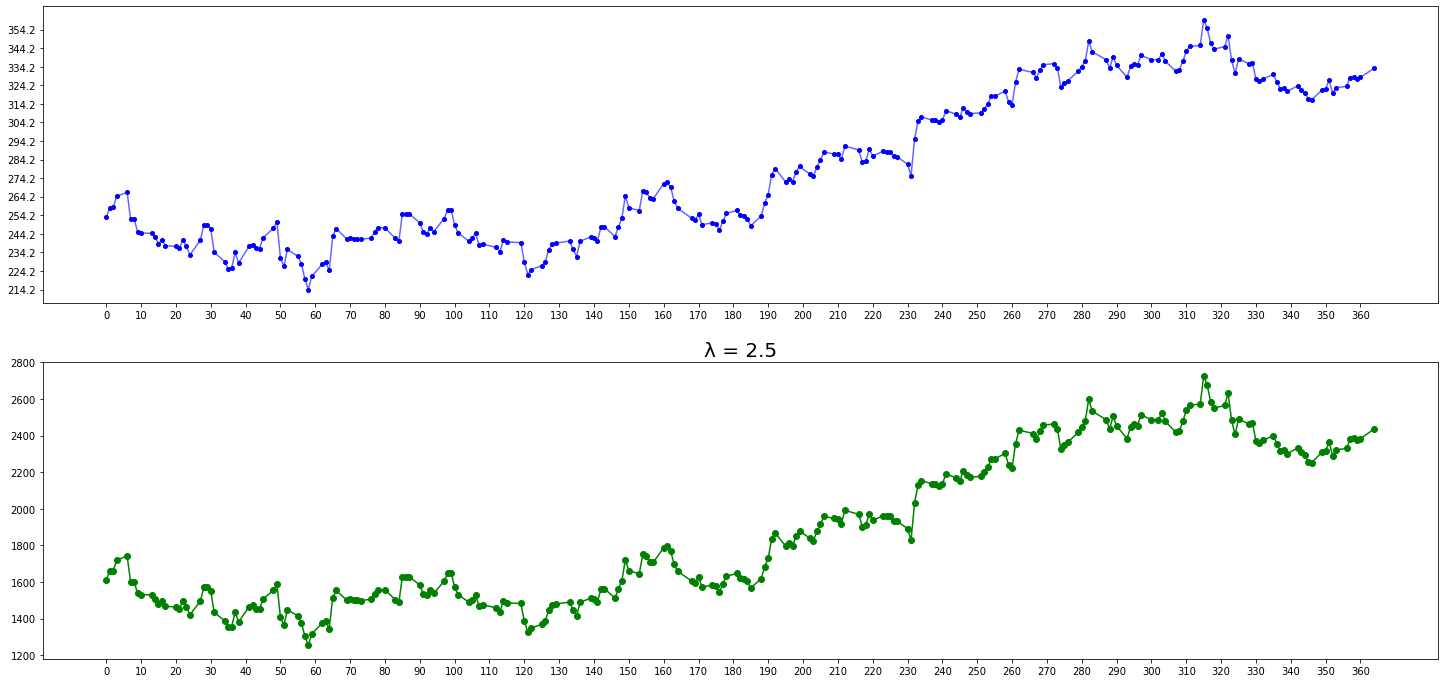

In [35]:
import math

def boxcox(series, Lambda):
    new_series = [series[i] ** (Lambda - 1) / Lambda if Lambda != 0 else math.log(series[i]) for i in range(len(series))]
    return new_series

l = [0, 0.2, 0.5, 0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.5]
for i in range(len(l)):
    make_plot(sales['Close'], boxcox(sales['Close'], l[i]), sales['Day'], sales['Day'], f"\u03bb = {l[i]}")

